In [ ]:
!pip install xgboost
! pip install gplearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import csv
import re
from matplotlib import pyplot as plt

from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
dataset = pd.read_csv('/content/docker images dataset.csv')
dataset.columns.values

array(['docker image', 'Tag ', 'Created on ', 'Size', 'package manager ',
       'base image', '# alternative base imgs ', '# tested dependences ',
       '# valnarble dependeces  ', 'critical', 'high  ', 'medium ',
       'low ', '# of downloads', 'secure'], dtype=object)

In [ ]:
dataset.describe()

Created on   # alternative base imgs   # tested dependences   \
count   305.000000                313.000000             313.000000   
mean    356.078490                  0.488818             158.881789   
std     616.765117                  1.059467             167.546383   
min       0.041667                  0.000000               0.000000   
25%       2.000000                  0.000000              54.000000   
50%      14.000000                  0.000000             112.000000   
75%     365.300000                  1.000000             169.000000   
max    3285.000000                  6.000000            1016.000000   

       # valnarble dependeces      critical      high        medium   \
count                313.000000  313.000000  313.000000   312.000000   
mean                  98.204473    2.201278    8.102236    32.278846   
std                  224.783278    7.281941   23.488044   107.798650   
min                    0.000000    0.000000    0.000000     0.000000   
25%                    0.000000    0.000000    0.000000     0.000000   
50%                   21.000000    0.000000    0.000000     0.500000   
75%                   64.000000    1.000000    4.000000    11.000000   
max                 2450.000000   79.000000  193.000000  1190.000000   

              low   # of downloads      secure  
count   313.000000    3.130000e+02  313.000000  
mean     53.226837    1.075449e+10    0.536741  
std     106.442245    3.068917e+10    0.499447  
min       0.000000    0.000000e+00    0.000000  
25%       0.000000    1.000000e+07    0.000000  
50%       9.000000    1.000000e+08    1.000000  
75%      52.000000    5.000000e+08    1.000000  
max    1064.000000    1.000000e+11    1.000000

In [ ]:
dataset.head(50)

docker image                        Tag   \
0                                drupal                      latest   
1                              postgres                      latest   
2                               busybox                      latest   
3                                docker                      latest   
4                                  ruby                      latest   
5                                   gcc                      latest   
6                                 redis                      latest   
7                                  pypy                      latest   
8                                 nginx                      latest   
9                                 httpd                      latest   
10                                  php                      latest   
11                            memcached                      latest   
12                               debian                      latest   
13   cssinsurance/kube-fluentd-operator                      latest   
14                       amazoncorretto                      latest   
15                               consul                      latest   
16                               fedora                          38   
17                               fedora                     rawhide   
18                               fedora                          37   
19                               fedora                          36   
20                               fedora                          35   
21                               tomcat            10-jdk11-temurin   
22                               tomcat                  10.1-jre11   
23                               tomcat                      latest   
24                               ubuntu                     rolling   
25                               groovy                      latest   
26                              mariadb                      latest   
27                               ubuntu                       22.04   
28                              openjdk                      latest   
29                              openjdk           20-ea-28-jdk-slim   
30                       fluent/fluentd    v1.15.2-debian-amd64-1.0   
31                       fluent/fluentd              v1.15-debian-1   
32               aimvector/fluentd-demo                      latest   
33                               alpine                      latest   
34                            wordpress                      latest   
35                            wordpress                     6.1-fpm   
36                                mongo                      latest   
37          joycelin79/newman-extension                       0.0.7   
38  fluent/fluentd-kubernetes-daemonset             v1-debian-kafka   
39  fluent/fluentd-kubernetes-daemonset  v1.15.3-debian-forward-1.0   
40              aimvector/mysql-example                      latest   
41         calyptia/core-docker-desktop                       0.4.1   
42                       dpage/pgadmin4                        6.15   
43                              fluentd                      latest   
44      caretdev/intersystems-extension                       0.1.4   
45         loftsh/vcluster-dd-extension                       0.0.7   
46                     k8s.gcr.io/pause                         3.8   
47          aimvector/wordpress-example                      latest   
48               docker/getting-started                      latest   
49                               fedora                          34   

    Created on      Size package manager                           base image  \
0           4.0    560MB              deb           php:8.2.1-apache-bullseye   
1           5.0    379MB              deb              postgres:15.1-bullseye   
2           5.0   4.86MB            linux                             busybox   
3           6.0    152MB              apk      docker:20.10.22-cli-alpine3.17   


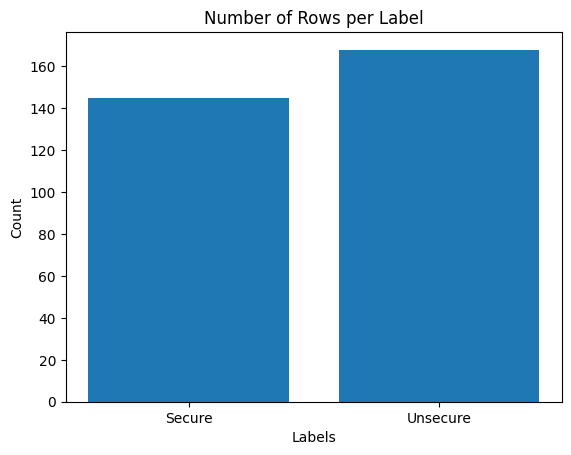

In [ ]:

# Count the number of rows per label
label_counts = dataset["secure"].value_counts()

# Create a bar plot of the label counts
plt.bar(label_counts.index, label_counts.values)

# modify the x-axis tick labels
plt.xticks([0, 1], ["Secure", "Unsecure"])
# Add title and labels to the plot
plt.title("Number of Rows per Label")
plt.xlabel("Labels")
plt.ylabel("Count")

# Display the plot
plt.show()

In [ ]:
print(dataset["secure"].value_counts())

1    168
0    145
Name: secure, dtype: int64


In [ ]:
# Convert the column to string format
dataset['Size'] = dataset['Size'].astype(str)

# Step 1: Parse the string
def extract_value(x):
    m = re.match(r'(\d+)([KMG]B)', x)
    if m:
        value = int(m.group(1))
        unit = m.group(2)
        return value, unit
    else:
        return None, None

dataset['Size'] = dataset['Size'].apply(lambda x: extract_value(x))

# Step 2: Convert to bytes
def convert_to_bytes(x):
    if x[0] is not None and x[1] is not None:
        if x[1] == 'KB':
            return x[0] * 1024
        elif x[1] == 'MB':
            return x[0] * 1024 * 1024
        elif x[1] == 'GB':
            return x[0] * 1024 * 1024 * 1024
        elif x[1] == 'B':
            return x[0] * 1024 
    else:
        return None

dataset['Size'] = dataset['Size'].apply(lambda x: convert_to_bytes(x))

# Step 3: Normalize the values
max_value = dataset['Size'].max()
dataset['Size'] = dataset['Size'] / max_value

# Step 4: Scale the values
dataset['Size'] = dataset['Size'] * 10

# Perform label encoding on the 'category' column
le = LabelEncoder()

dataset['package manager '] = dataset['package manager '].astype(str)
dataset['package manager '] = le.fit_transform(dataset['package manager '])

dataset['base image'] = dataset['base image'].str.split(':', expand=True)[0]
dataset['base image'] = le.fit_transform(dataset['base image'])

dataset['Tag '] = dataset['Tag '].astype(str)
dataset['Tag '] = le.fit_transform(dataset['Tag '])

dataset['secure'] = le.fit_transform(dataset['secure'])

dataset['# of downloads'].astype('float')
dataset['# of downloads'] = dataset['# of downloads'] / dataset['# of downloads'].max()



In [ ]:
df = dataset.dropna()
df.drop(columns= ['docker image'], axis = 1)
X = df.drop(columns=['secure'], axis = 1)
y = df['secure']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# Supervised Learning 

# RandomForestClassifier

In [ ]:
SEED = 42
rfc = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=SEED)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Calculate the classification metrics with average='weighted'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



ValueError: ignored

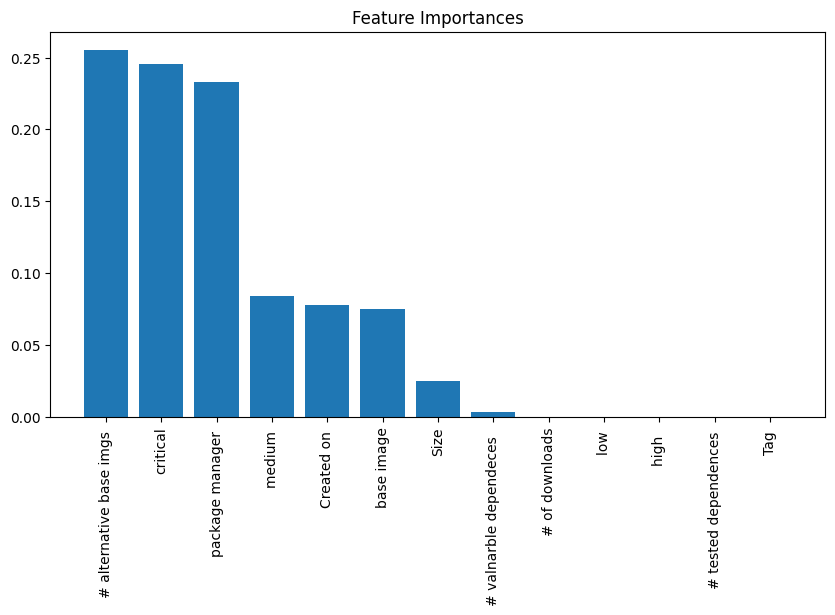

In [ ]:
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

# Get the names of the features
features = X.columns.values

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
df = df.drop(columns=["# of downloads", "low ", "high  ", "Tag ", "# tested dependences " , "Size", "# valnarble dependeces  ", "docker image"], axis=1)
df = df.dropna()

In [ ]:
X = df.drop(columns=['secure'], axis = 1)
y = df['secure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
SEED = 42
rfc = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=SEED)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

# Create a gradient boosting classifier with 100 trees
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
gbc.fit(X_train, y_train)

# Evaluate the model on the testing set
score = gbc.score(X_test, y_test)
print("Gradient Boosting Accuracy:", score)
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

Gradient Boosting Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.90      1.00      0.95        18

    accuracy                           0.92        26
   macro avg       0.95      0.88      0.90        26
weighted avg       0.93      0.92      0.92        26



In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = gbc.predict(X_test)
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9230769230769231
Precision: 0.9
Recall: 1.0
F1-score: 0.9473684210526316


In [ ]:
! pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.88
Accuracy: 0.8846153846153846
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1-score: 0.918918918918919


# Gradient Boosting Classifier

In [ ]:
model = xgb.XGBClassifier()

# train the model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate the error rate
cm = confusion_matrix(y_test, y_pred)
error_rate = 1 - cm.diagonal().sum() / cm.sum()
print("Error rate:", error_rate)
y_pred = model.predict(X_test)
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8846153846153846
Error rate: 0.11538461538461542
Accuracy: 0.8846153846153846
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1-score: 0.918918918918919


# GaussianProcessRegressor

In [ ]:
kernel = RBF()

# build the GPR model
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# fit the model on training data
gpr.fit(X_train, y_train)

# predict on test data
y_pred = gpr.predict(X_test)

# calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
y_pred = gpr.predict(X_test)

# Assuming threshold of 0.5 for binary classification
y_pred= np.where(y_pred > 0.5, 1, 0)
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Mean Absolute Error: 0.26966430602449876
RMSE: 0.4281487865318557
R-squared: 0.13945489455359994
Accuracy: 0.8461538461538461
Precision: 0.9375
Recall: 0.8333333333333334
F1-score: 0.8823529411764706


# SymbolicRegressor

In [ ]:
# Define the search space and other parameters
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min']
est_gp = SymbolicRegressor(population_size=5000, generations=20, tournament_size=20,
                            function_set=function_set, metric='mean absolute error',
                            verbose=1, random_state=0)

# Fit the model to the training data
est_gp.fit(X_train, y_train)

# Compute the R-squared value on the testing data
y_pred = est_gp.predict(X_test)
y_bar = y_test.mean()
TSS = ((y_test - y_bar) ** 2).sum()
RSS = ((y_pred - y_test) ** 2).sum()
r2 = 1 - RSS/TSS
print("R-squared: ", r2)
y_pred= np.where(y_pred > 0.5, 1, 0)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.77          87083.2       20        0.0695806              N/A      1.29m
   1    11.91          2879.38       19        0.0671953              N/A     54.96s
   2    17.04      3.15055e+07       19        0.0347011              N/A     49.30s
   3    14.87      2.89345e+07       13        0.0334646              N/A     45.45s
   4    18.15          1306.18       23        0.0333333              N/A      1.03m
   5    17.37           993.39       29       0.00343334              N/A     42.25s
   6    12.71          17.0061       26       0.00135033              N/A     39.95s
   7    11.54          4.23695       25      0.000387406              N/A     33.83s
   8    12.71          4.74757       45      6.35405e-05              N/A  

In [ ]:
# Import the necessary libraries
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Train the classifier using the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)
y_pred= np.where(y_pred > 0.5, 1, 0)
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9615384615384616
Accuracy: 0.9615384615384616
Precision: 0.9473684210526315
Recall: 1.0
F1-score: 0.972972972972973


In [ ]:
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier object
svm = SVC(kernel='linear')

# Train the SVM classifier using the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9230769230769231
Accuracy: 0.9230769230769231
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-score: 0.9444444444444444


In [ ]:
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression classifier object
lr = LogisticRegression()

# Train the logistic regression classifier using the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9615384615384616
Accuracy: 0.9615384615384616
Precision: 0.9473684210526315
Recall: 1.0
F1-score: 0.972972972972973


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# UNSUPERVISED LEARNING 

# KMeans

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, kmeans.labels_)

print("The average silhouette score is:", silhouette_avg)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

The average silhouette score is: 0.767266704594365
Accuracy: 0.9230769230769231
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1-score: 0.9444444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# kNN